# Redes Neuronales - TP1
                                                              
Autor: Gustavo Quintero

05 de Octubre 2022

## 1. Librerias

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

from skimage import io, util, transform

## 2. Introducción

### Red Neuronal Biológica 

Una neurona biológica es una célula nerviosa electricamente excitable e interconectada dentro del cerebro que procesa y transmite información a través de señales eléctricas y químicas. Las neuronas estan conectadas entre sí para formar una red en el cerebro.

### Red Neuronal Artificial 

Es un algoritmo que consiste en simular el comportamiento de un cerebro biológico mediante miles de neuronas artificales interconectadas que se agrupan en *capas*, formando miles de conexiones.

Para que las redes neuronales puedan funcionar requieren de un proceso de entrenamiento en el que se van conformando capas con un peso determinado en la toma de decisiones. A través de datos, se va consiguiendo afinar el aprendizaje de estos sistemas y se consigue que las neuronas artificiales puedan identificar y solucionar problemas, dando respuestas similares a las que daria un ser humano.

### Tipos de Redes Neuronales Artificiales (RNA)

- Por número de capas.
  - Monocapas: Son las más sencillas. La capa de entrada se conecta directamente con la salida.
  - Multicapa: Cuenta con varias capas diferenciales.
- Por tipos de conexiones.
  - No recurrentes: Carecen de memoria.
  - Recurrentes: Poseen memoria y son más potentes. En ellas, la salida en un tiempo $t+1$ de sus neuronas se emplea como otra entrada asi misma. Y la salida de la red se determina por las entradas y por los valores en salidas previas.
- Por grados de conexions.
  - Totalmente conectadas.
  - Parcialmente conectadas.
- Convolucionales: Aquí las neuronas artificiales presentan similitud a las neuronas biológicas ubicadas en la corteza visual primaria del cerebro biológico. Son creadas de forma bidimensional, y son muy efectivas para tareas de visión artificial. Por ejemplo, para clasificar imágenes.

### Funciones de las RNA.

Dependiendo de su entrenamiento pueden realizar.

- Reconocimiento
- Predicciónes

Las conexiones entre las neuronas pueden ser.
- Excitatoria, si el sígno del peso sináptico asociado a la conexión es positiva.
- Inhibitoria, en caso de ser negativo.
- Intercapa, corresponde a las conexiones entre las neuronas de distintas capas.
- Intracapa, corresponde a las conexiones entre las neuronas de una misma capa.


### Memoria humana.

La memoria se describe como la capacidad o función del cerebro que permite retener y recordar, mediante procesos asociativos inconscientes, sensaciones, impresiones, ideas y conceptos previamente experimentados, así como toda la información que se ha aprendido concientemente.

La memoria tiene tres funciones básicas, recoge nueva información, organiza la información para que tenga su significado y la recupera cuando necesita recordar algo. El recuerdo de rostros, datos, hechos o conocimientos consta de 3 etapas:

- Codificiación: Es la transformación de los estímulos en una representación mental.

- Almacenamiento: Consiste en retener los datos en la memoría para utilizarlas luego.

- Recuperación: Es la forma en que las personas acceden a la información almacenada en su memoria. Puede ser espontánea, cuando los recuerdos surgen de manera casual o voluntaria.

### Memoria Asociativa.

Un dispositivo de almacenamiento de información se llama memoria asociativa si permite recuperar información a partir de conocimiento parcial de su contenido, sin saber su localización de  almacenamiento.

Las memorias asociativas son de una de las RNA más importantes con aplicaciones en múltiples áreas tales como, memoria de acceso por contenido, identificación de patrones y control inteligente.

Una memoria asociativa puede almacenar información y recuperarla cuando sea necesario, es decir, una red retroalimentada, cuya salida se utiliza repetidamente como una nueva entrada hasta que el proceso converja. Puede recuperar dicha información basandose en el conocimiento de parte de ésta (clave). El patrón puede ser una versión con ruido de una patrón memorizado, esto es, que difiere de él en pocas componentes (características o atributos). Por ejemplo, la memoria humana recuerda a una persona aunque vaya vestida de forma diferente o lleve lentes.

### Modelo de Hopfield.

John J. Hopfield en 1980 propuso dos modelos basados en el concepto de memoria asociativa, el modelo discreto que toma el valor de 1 o -1 y una generalización que permite tomar todos los valores en [0,1], el modelo continuo.

La noción de memoria asociativa es importante para resolver el siguiente problema

*''Almacenar un conjunto de patrones $p$ patrones $\xi_i^\mu$ de tal manera que cuando se presenta un nuevo patrón $\zeta_i$, la red responda produciendo cualquiera de los patrones almacenados $\xi_i^\mu$ que más se parezca a $\zeta_i$.''*

Los patrones son vectores etiquetados por $\mu = 1,2,...,p$, mientras que las neuronas (unidades, nodo o núcleos) en la red son etiquetados por $i=1,...,N$. Tanto los patrones almacenados $\xi_i^\mu$ como los de prueba $\zeta_i$ toman los valores de 0/1 ó 1/-1 en sus componentes.

Lo anterior se puede hacer en una computadora convencional, simplemente almacenando una lista de los patrones $\xi_i^\mu$ y escribiendo un programa que calculé la distancia de Hamming entre $\xi_i^{\mu}$ y $\zeta_i$ 

$$d(\xi^{\mu},\zeta)=\sum_{i=1}^{N}[\xi_i^\mu(1-\zeta_i)+(1-\xi_i^\mu)\zeta_i]$$

Con el patrón de prueba $\zeta$, encontraremos entre los patrones almacenados el que más se aproxime a él de acuerdo a sus componenetes y se tiene así el resultado buscado.

De modo que, queremos hallar una red de McCulloch-Pitts que lo determine. Sea $n_j=\zeta_j$ con $0\leq j\leq N$, el patrón de entrada (ha reconocer). Queremos hallar el conjunto de $\omega_{ij}$ que permita determinar en la red el patrón almacenado $\xi_j^{\mu_0}$ con $1\leqslant\mu_0\leqslant p$, si existe, tal que $n_j=\xi_j^{\mu_0}$ y cuya distancia de Hamming sea la menor. 

Además, se desea que tenga memoria asociativa de contenido direccionable (memoria computacional empleada en aplicaciones que requieren de velocidades de busqueda muy elevadas).

### Modelo Discreto de Hopfield.

El modelo de Hopfield es una RNA monocapa con $n$ neuronas (unidades o núcleos) totalmente interconectadas pero no consigo mismas, cuyos valores de entrada y salida son binarios (0/1 ó 1/-1). Además, los pesos asociados a las conexiones entre pares de neuronas son simétricos.

Una red neuronal artificial discreta de Hopfield está constituida por

- **El conjunto de $p$ patrones** $\lbrace\xi^1,\ldots,\xi^\mu\rbrace$ que se desea almacenar; donde cada patrón $\xi^\mu$ con  $1\leqslant\mu\leqslant p$ es un véctor n-dimensional cuyas componentes toman valores binarios -1 ó 1. Así,

$$\xi^\mu=(\xi^\mu_1,\xi^\mu_2,\ldots,\xi^\mu_n)\hspace{1cm}1\leq\mu\leq p$$

- **La matriz de pesos sinapticos** $W_{n\times n}$, donde $\omega_{ij}$ representa el peso sináptico de la conexión de la neurona $j$ a la $i$ o viceversa, tal que
   - $W_{n\times n}$ es simétrica, esto es, el peso de conexión entre dos neuronas tiene el mismo valor en ambos sentidos.
   - Los elementos de la diagonal de la matriz son cero, porque no hay conexión de cada neurona consigo misma. Y se calcula en forma
      - Asincrónica:
      
      $$ \omega_{ij}=\sum_{\mu=1}^{p} \xi_i^\mu\xi_j^\mu\hspace{1cm} 1\leqslant i,j\leqslant n$$
      
        Con $\omega_{ij}=\omega_{ji},\hspace{0.5cm}i\neq j,\hspace{0.5cm}\omega_{ij}=0,\hspace{0.5cm}i=j.$
      - Sincrónica:
      
        En forma matricial
        $$W_{n\times n}=PP^{\top}-pI_{n\times n}$$
        donde 
        - $P=(\xi^1, \xi^2,\ldots,\xi^{p})_{n\times p}$
        - $p:$ es el número de patrones almacenar. 
        - $I_{n\times n}:$ es la matriz identidad.

- **Un patrón de prueba** $\zeta$, es un patrón diferente de los almacenados, tal que $\zeta = (\zeta_1,\zeta_2,\ldots,\zeta_n)$.

  Queremos utilizar la red para ver si existe, $\xi^\mu$
  con $1\leq\mu\leq p$ que más se aproxime  o se parezca a      $\zeta$. Para ello, se inicializa el estado de la red (n-neuronas) empleando el patrón de prueba $\zeta$ de la forma.
   - Asincrónica:
     $$S_j(t)=\zeta_j\hspace{1cm} 1\leq j\leq n$$
     Esto es, el estado de la neurona j
   
   - Sincrónica:
      \begin{align}
        S(t) &= \begin{bmatrix}
              S_1(t) \\
              \vdots \\
              S_j(t) \\
              \vdots \\
              S_n(t)
            \end{bmatrix}_{n\times 1} =
          \begin{bmatrix}
              \zeta_1 \\
              \vdots \\
              \zeta_j \\
              \vdots \\
              \zeta_n
            \end{bmatrix}_{n\times 1} =
          \zeta
      \end{align}
      esto es, $S(t) =\zeta$ el estado de entrada de la red.

- **Función de propagación**, determina el valor del potencial postsináptico de la red en forma:
  - Asincrónica.
  $$h_{i}(t)=\sum_{j=1}^{n}\omega_{ij}S_{j}(t)\hspace{1cm}1\leq i\leq n$$
    
    esto es, el valor potencial postsináptico de la neurona $i$.
  - Sincrónica
  $$h(t)=W_{n\times n}\cdot S(t)$$
    Potencial sináptico de la red, indicando el valor del mismo en    cada neurona $i$ con $1\leq i\leq n$.

- **Función de activación (recuperación o actualización)**: Proporciona el estado de la salida de la red en el tiempo $t+1$, e indica que tan cerca o lejos nos encontraremos del patrón buscado almacenado. Calculandola: dada la función:

$$sgn(x)= \left\{ \begin{array}{lcc}
             1 &   ,si  & x \geq 0 \\
             \\ -1 &  ,si & x < 0
             \end{array}
   \right.$$
  - Asincrónica
  $$S_i(t+1)=sgn(h_i(t))\hspace{1cm}1\leq i\leq n$$
  
  - Sincrónica
  
  $$S(t+1)=sgn(h(t))\hspace{1cm}1\leq i\leq n$$

## 3. Problemas

### 1.  Entrene una red de Hopfield ‘82 con un conjunto de imágenes binarias.

Primero definimos las funciones a emplear para poder realizar el entrenamiento de la red.

In [2]:
def signo(h):
    if np.size(h) != 1:
        s = np.where(h >= 0, 1, -1)
    else:
        if h >= 0:
            s = 1
        else:
            s = -1
    return s

def Hopfield_train(patterns):
    P = np.zeros((patterns[0].shape[0]*patterns[0].shape[1], len(patterns)))
    I = np.identity(patterns[0].shape[0]**2)
    for p in range(len(patterns)):
        P[:,p] = patterns[p].flatten()
        P = np.where(P > 0, 1, -1)
        W = np.dot(P,np.transpose(P))-len(patterns)*I
    return W

def Hopfield(pattern, W, Sync = True):
    if Sync:
        S_in = np.where(pattern.flatten()> 0, 1, -1)
        changed = True
        while changed:
            S_out = signo(np.dot(S_in,W))
            changed = not np.array_equal(S_in,S_out)
            S_in = S_out
    else:
        S_in = np.where(pattern.flatten()> 0, 1, -1)
        S_out = S_in 
        changed = True
        while changed:
            indices = np.array(range(len(S_in)))
            random.shuffle(indices)
            for i in indices:
                S_in[i] = signo(np.dot(S_in,W[i]))
            changed = not np.array_equal(S_in,S_out)
            S_out = S_in.copy()
    return S_out

Luego se cargan los patrones con los que se llevara a cabo el entrenamiento.

In [3]:
images = []
images_shape = []
files = os.listdir()
for data in files:
    if '.bmp' in data:
        image = io.imread(data)
        images.append(image)
        images_shape.append(image.shape)
images_shape = list(set(images_shape))
print(images_shape)

[(45, 60), (50, 50)]


<IPython.core.display.Javascript object>


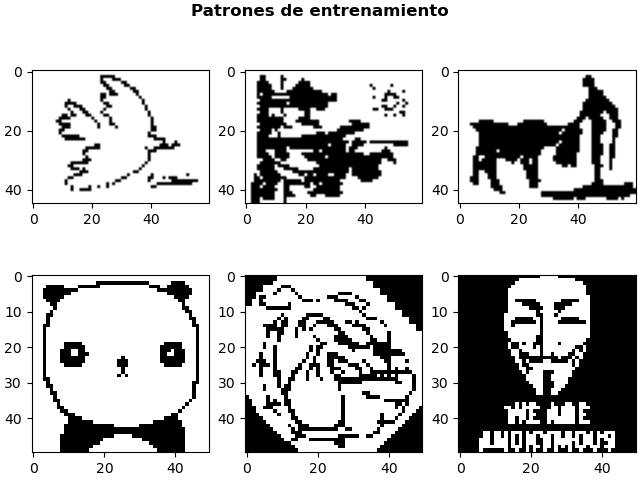

In [4]:
fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
axes[0, 0].imshow(images[0], cmap='gray')
axes[0, 1].imshow(images[3], cmap='gray')
axes[0, 2].imshow(images[4], cmap='gray')
axes[1, 0].imshow(images[1], cmap='gray')
axes[1, 1].imshow(images[2], cmap='gray')
axes[1, 2].imshow(images[5], cmap='gray')
fig.suptitle('Patrones de entrenamiento',fontweight ="bold")
plt.show()

Se seleccionan aquellos patrones con dimensiones de (50,50) y se hace el entrenamiento de la red

In [5]:
images_train = [] 
for image in images:
    if image.shape == images_shape[1]:
        images_train.append(image)
W = Hopfield_train(images_train)

### a) Verifique si la red aprendió las imágenes enseñadas.

Para esto, se le presentan a la red los patrones aprendidos y se evalua la convergencia de cada uno de ellos.

<IPython.core.display.Javascript object>


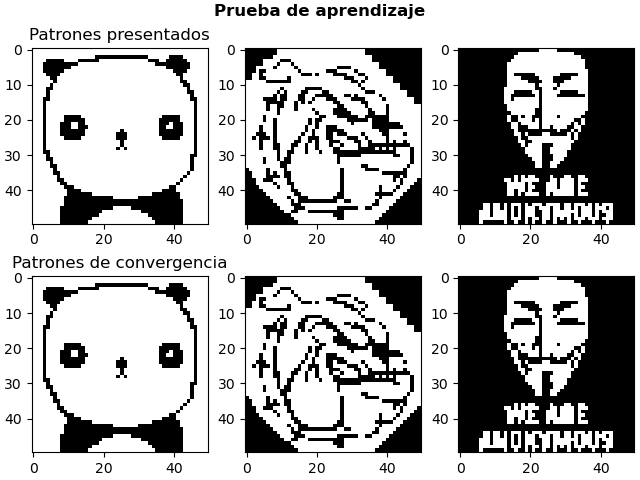

In [6]:
fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
axes[0, 0].imshow(images_train[0], cmap='gray')
axes[0, 0].set_title('Patrones presentados')
axes[0, 1].imshow(images_train[1], cmap='gray')
axes[0, 2].imshow(images_train[2], cmap='gray')
axes[1, 0].imshow(Hopfield(images_train[0],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(images_train[1],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 2].imshow(Hopfield(images_train[2],W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Prueba de aprendizaje',fontweight ="bold")
plt.show()

Por lo tanto, podemos decir que la red aprendio los patrones enseñados.

### b) Evalúe la evolución de la red al presentarle versiones alteradas de las imágenes aprendidas: agregado de ruido, elementos borrados o agregados.

La red de Hoplfield evoluciona de un estado inicial o configuración de la red (neuronas), que se representan por $S_i(0)$  con $1\leq i \leq n$ donde $S_i(0)$ pertenece al conjunto {-1,1}; esto es, $S_i(0)$ el estado inicial de la neurona $i$, y en cada iteración se actualiza una neurona seleccionada aleatoriamente (diferente de la anterior) siguiendo la regla de actualización, dada por la función de activación. Si en la iteración $t+1$, se ha seleccionado la neurona $i$. Cuando después de actualizar todas las unidades de la red (neuronas), ninguna de ellas cambia su estado anterior se dice que la red se ha estabilizado y el estado que presentan las neuronas ahí, constituye su estado final.

<IPython.core.display.Javascript object>


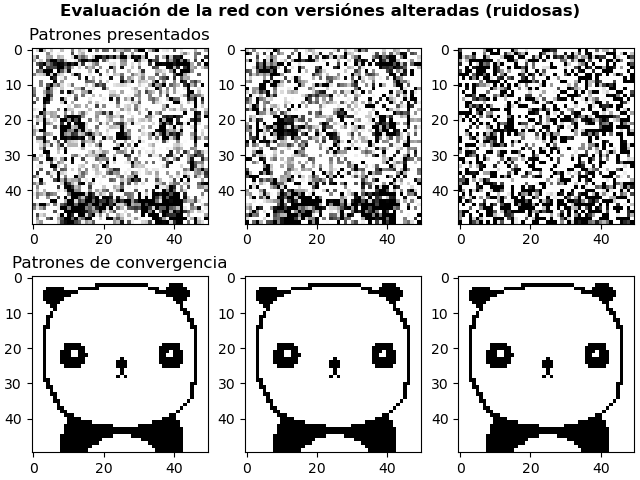

In [7]:
p = 0
    
image_0 = util.random_noise(images_train[p], mode='gaussian', var = 0.3)
image_1 = util.random_noise(images_train[p], mode='gaussian', var = 0.5)
image_2 = util.random_noise(images_train[p], mode='gaussian', var = 2)
    
fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
axes[0, 0].imshow(image_0, cmap='gray')
axes[0, 0].set_title('Patrones presentados')
axes[0, 1].imshow(image_1, cmap='gray')
axes[0, 2].imshow(image_2, cmap='gray')
axes[1, 0].imshow(Hopfield(image_0,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(image_1,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 2].imshow(Hopfield(image_2,W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Evaluación de la red con versiónes alteradas (ruidosas)',fontweight ="bold")
plt.show()

Por lo tanto, en este caso, la evolución de la red de Hopfield frente a versiones ruidosas de los patrones aprendidos implica que esta red es bastante tolerante al ruido. En este caso, permitió recuperar uno de los patrones aprendido en presencia de ruido gaussiano en los diferentes casos presentados (todos con un valor de varianza diferente).

<IPython.core.display.Javascript object>


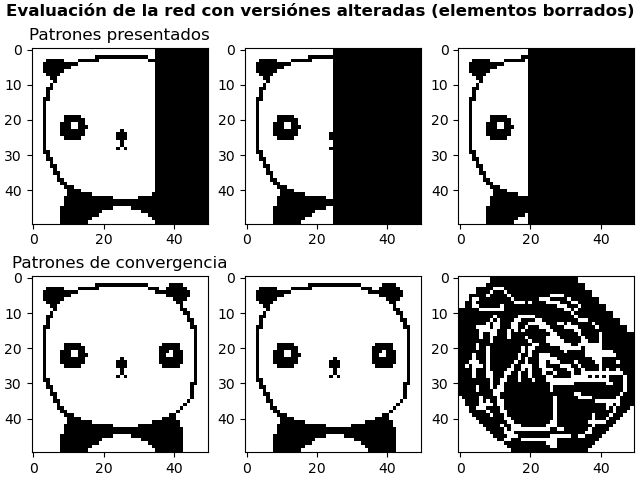

In [8]:
p = 0

image_0 = np.zeros(images_train[p].shape)
image_0[:,:35] = images_train[p][:,:35]
    
image_1 = np.zeros(images_train[p].shape)
image_1[:,:25] = images_train[p][:,:25]
    
image_2 = np.zeros(images_train[p].shape)
image_2[:,:20] = images_train[p][:,:20]

fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
axes[0, 0].imshow(image_0, cmap='gray')
axes[0, 0].set_title('Patrones presentados')
axes[0, 1].imshow(image_1, cmap='gray')
axes[0, 2].imshow(image_2, cmap='gray')
axes[1, 0].imshow(Hopfield(image_0,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(image_1,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 2].imshow(Hopfield(image_2,W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Evaluación de la red con versiónes alteradas (elementos borrados)',fontweight ="bold")
plt.show()

La evolución de la red de Hopfield frente a versiones con elementos borrados de los patrones aprendidos muestra que la red trabaja bien como una memoria asociativa siempre y cuando se le presenten los patrones aprendidos con al menos un 50% de su información.

<IPython.core.display.Javascript object>


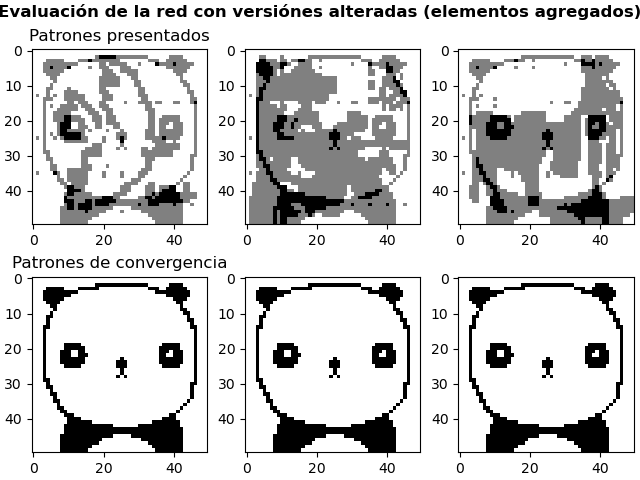

In [9]:
images_add = [] 
for image in images:
    if image.shape != (50,50):
        images_add.append(np.where(transform.resize(image,(50,50))==1, 255, 0))
    
p=0

image_0 = images_train[p] + images_add[0]
image_1 = images_train[p] + images_add[1]
image_2 = images_train[p] + images_add[2]
fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
axes[0, 0].imshow(image_0, cmap='gray')
axes[0, 0].set_title('Patrones presentados')
axes[0, 1].imshow(image_1, cmap='gray')
axes[0, 2].imshow(image_2, cmap='gray')
axes[1, 0].imshow(Hopfield(image_0,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(image_1,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 2].imshow(Hopfield(image_2,W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Evaluación de la red con versiónes alteradas (elementos agregados)',fontweight ="bold")
plt.show()

En este último caso se mezcló uno de los patrones aprendidos con diferentes patrones no vistos antes por la red (los patrones con los que no se entreno), con la finalidad de evaluar su evolución, concluyendo que la red de Hopfield es bastante tolerante a elementos agregados. En este caso, permitió recuperar el patron aprendido en presencia de patrones distintos a los aprendidos en los diferentes casos presentados.

### c) Evalúe la existencia de estados espurios en la red: patrones inversos y combinaciones de un número impar de patrones. (Ver Spurious States, en la sección 2.2, Hertz, Krogh & Palmer, pág. 24).

Supongamos que tenemos un objeto sujetado en el extremo de una superficie convexa, por lo tanto, el objeto tendrá cierta energía potencial. Al soltarlo, irá transformando esta energía potencial en energía cinética; y además perderá parte de esta energía en forma de calor a causa de la fricción con el aire y la superficie. Finalmente, después de un tiempo, llegará a un estado estable (donde ya no se moverá) y tendrá energía mínima, porque estará en la parte más baja de la curva, con energía potencial mínima y energía cinética cero.

En la RNA de Hopfield se define una función de energía $H$ que asegura alcanzar mínimos locales en los patrones que se desean recuperar $\xi_i^\mu$ (recordar). A estos $\xi_i^\mu$ se les llama estados estables. No se puede asegurar que estos sean los únicos mínimos de $H$. De hecho existen otros.

Los estados espurios (falsos), son patrones diferentes a los patrones enseñados (llamados de recuperación). La energía en estos patrones espurios también es un mínimo local de $H$.

- Para cada patrón $\xi_i^\mu$ almacenado, la negación $-\xi_i^\mu$ (inverso) es un estado espurio con igual energía que $\xi_i^\mu$.

- Un estado espurio también puede ser una combinación lineal (mezcla) de un número k (impar) de los estados de recuperación (enseñados). Esto es

   $$sgn(\sum_{\mu=1}^{k}\xi_i^\mu)=\xi_i^{mix}\hspace{1cm}$$
 
   los más sencillos son combinaciones simétricas de tres patrones,  para obtener el estado espurio.

  $$\xi_{i}^{mix}=sgn(\pm\xi_{i}^{1},\pm\xi_{i}^{2},\pm\xi_{i}^{3})$$.
  
- Los estados espurios no se obtienen con un número par de patrones, porque pueden sumar cero en alguna de sus combinaciones.

- Para $p$ grandes existen mínimos locales de la función de energía $H$ que no estan relacionados con ningún número finito de patrones de entrenamiento. A estos se les llama estados de *''glasses spin´´*, debido a los modelos de *''glasses spin´´* en mecánica estadistíca. En estos casos la memoria no funciona correctamente y los patrones son mínimos locales adicionales.
  
Teniendo en cuenta esto, procederemos a evaluar la existencia de estados espurios en la red ya entrenada. Lo primero es mostrarle a red los patrones inversos a los aprendidos, y evaluar su convergencia.

In [10]:
images_train_ = []
for image in images_train:
    images_train_.append(np.where(image > 0, 0, 1))

<IPython.core.display.Javascript object>


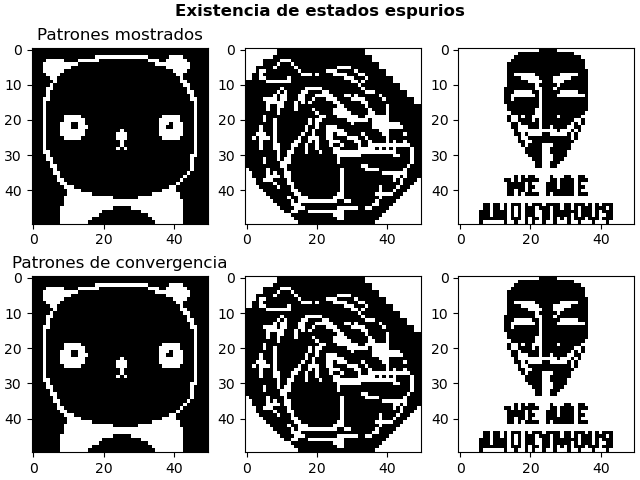

In [11]:
fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
axes[0, 0].imshow(images_train_[0], cmap='gray')
axes[0, 0].set_title('Patrones mostrados')
axes[0, 1].imshow(images_train_[1], cmap='gray')
axes[0, 2].imshow(images_train_[2], cmap='gray')
axes[1, 0].imshow(Hopfield(images_train_[0],W).reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(images_train_[1],W).reshape(50, 50), cmap='gray')
axes[1, 2].imshow(Hopfield(images_train_[2],W).reshape(50, 50), cmap='gray')
fig.suptitle('Existencia de estados espurios',fontweight ="bold")
plt.show()

Luego, hacemos la combinación lineal de los patrones aprendidos (incluyendo sus inversas) y evaluamos la convergencia de la red de Hopfield.

<IPython.core.display.Javascript object>


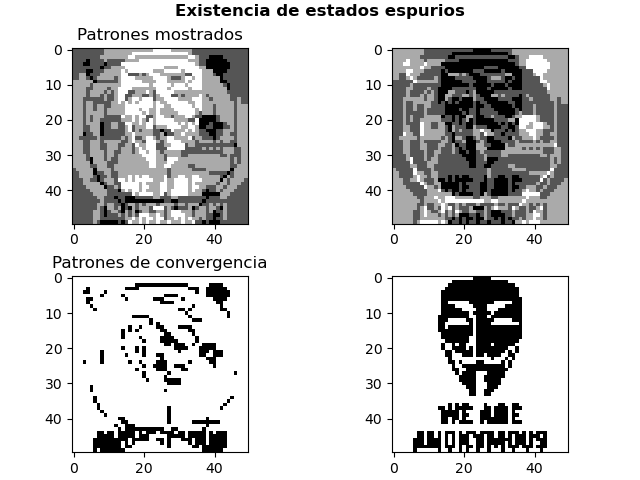

In [12]:
image_0 = np.where(images_train[0]> 0,1,0) + np.where(images_train[1]>0,1,0) + np.where(images_train[2]>0,1,0)
image_1 = images_train_[0] + images_train_[1] + images_train_[2]
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
axes[0, 0].imshow(image_0, cmap='gray')
axes[0, 0].set_title('Patrones mostrados')
axes[0, 1].imshow(image_1, cmap='gray')
axes[1, 0].imshow(Hopfield(image_0,W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(image_1,W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Existencia de estados espurios',fontweight ="bold")
plt.show()

La combinación lineal de los patrones inversos enseñados no convergue a un estado espurio, para explicar esto hay que ver el resultado de la combinanción lineal luego de aplicarle la función signo.

<IPython.core.display.Javascript object>


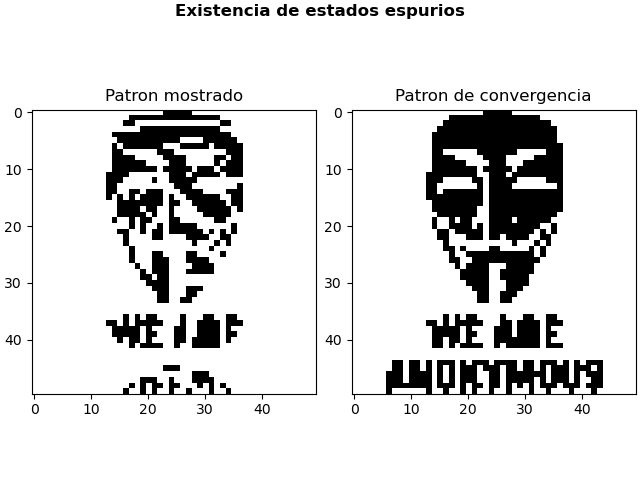

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
axes[0].imshow(np.where(image_1 > 0, 1, -1), cmap='gray')
axes[0].set_title('Patron mostrado')
axes[1].set_title('Patron de convergencia')
axes[1].imshow(Hopfield(np.where(image_1 > 0, 1, -1),W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Existencia de estados espurios',fontweight ="bold")
plt.show()

Por lo tanto se puede afirmar la existencia de estados espurios en la red de Hopfield entrenada, a excesión del caso de la combinanción lineal de los patrones inversos.

### d) Realice un entrenamiento con todas las imágenes disponibles. ¿Es capaz la red de aprender todas las imágenes? Explique.

<IPython.core.display.Javascript object>


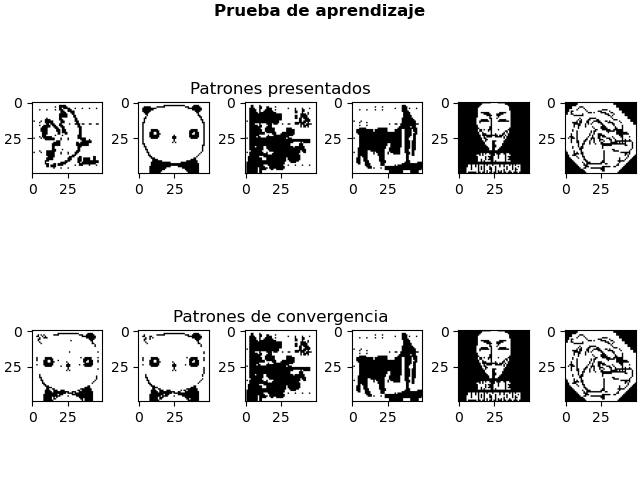

In [15]:
images_all = images_train + images_add
random.shuffle(images_all)
W = Hopfield_train(images_all)

fig, axes = plt.subplots(ncols=6, nrows=2, constrained_layout=True)
axes[0, 0].imshow(images_all[0], cmap='gray')
axes[0, 2].set_title('Patrones presentados')
axes[0, 1].imshow(images_all[1], cmap='gray')
axes[0, 2].imshow(images_all[2], cmap='gray')
axes[0, 3].imshow(images_all[3], cmap='gray')
axes[0, 4].imshow(images_all[4], cmap='gray')
axes[0, 5].imshow(images_all[5], cmap='gray')
axes[1, 0].imshow(Hopfield(images_train[0],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 2].set_title('Patrones de convergencia')
axes[1, 1].imshow(Hopfield(images_all[1],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 2].imshow(Hopfield(images_all[2],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 3].imshow(Hopfield(images_all[3],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 4].imshow(Hopfield(images_all[4],W, Sync = False).reshape(50, 50), cmap='gray')
axes[1, 5].imshow(Hopfield(images_all[5],W, Sync = False).reshape(50, 50), cmap='gray')
fig.suptitle('Prueba de aprendizaje',fontweight ="bold")
plt.show()

Para este caso, la red no es capaz de aprender bien todas las imagenes, ya que en dos patrones presentados (distintos entre sí), converge en ambos casos a uno de ellos; tambien se observo el caso en el que lograba aprender todos los patrones, pero uno o dos no eran recuperados en su totalidad. Este problema de aprendizaje tiene que ver con una propiedad importante de la red de Hopfield, y es su capacidad de almacenamiento.

La capacidad de almacenamiento de la red esta relacionada con la probabilidad de que la red pueda aprender un patrón determinado, sabiendo que ya aprendio otros, es decir, esta relacionada con el hecho de ¿Cuándo la red deja de aprender?. ¿Cuando empieza ha olvidar?. ¿Cuando se satura?. Y en estas situaciones se dice que al red alcanzó su máxima capacidad y depende del error permitido de la red.

Por lo tanto, la red no es capaz de aprender todas las imagenes (o aprender todas en su totalidad) porque alcanzó su capacidad máxima de almacenamiento.

## 2.   

### a) Comprobar estadísticamente la capacidad de la red de Hopfield ‘82 calculando la cantidad máxima de patrones pseudo-aleatorios aprendidos en función del tamaño de la red. Obtener experimentalmente los resultados de la siguiente tabla (los valores de la tabla corresponden a una iteración con actualización sincrónica).

| Perror | pmax/N |
| :-: | :-: |
| 0,001 | 0,105 |
| 0,0036 | 0,138 |
| 0,01 | 0,185 |
| 0,05 | 0,37 |
| 0,1 | 0,61 |

**Capacidad de almacenamiento de la red de Hopfield.**
 
Dado un conjunto de patrones aprendidos,¿Cuál es la probabilidad de que la red pueda aprender un patrón determinado?. Esto indica, cuando la red deja de aprender o comienza a olvidar patrones aprendidos, o se satura y se dice entonces que la red alcanzó su máxima capacidad de almacenamiento, la cual depende del error cometido en el proceso.

Dado un conjunto de $p$-patrones $\xi^\mu$, con $1\leq\mu\leq p$   tal que

 $$\begin{align}
    \xi^\mu &= \begin{bmatrix}
           \xi^{\mu}_1 \\
           \vdots \\
           \xi^{\mu}_i \\
           \vdots \\
           \xi^{\mu}_n
         \end{bmatrix}
  \end{align}\hspace{1cm}Y\hspace{1cm}(\xi^{\mu})^{\top}=[\xi^{\mu}_{1},\ldots,\xi^{\mu}_{i},\ldots,\xi^{\mu}_n]$$
  
donde $n$ es el número de neuronas.

Supongamos que la red ha aprendido los $p$-patrones. Así, los pesos sinápticos son:

$$\omega_{ij}=\sum_{\mu=1}^{p}\xi_i^\mu\xi_j^\mu\hspace{1cm}1\leq i,j\leq p$$

Luego, la propagación lineal de la neurona $i$, $1\leq i\leq n$ con el $v$-patrón aprendido para algún $1\leq v\leq p$ es

$$h_i^v=\sum_{j=1}^{n}\omega_{ij}S_j^v\hspace{1cm} donde\hspace{1cm} S_j^v=\xi_j^v$$

equivalente a

$$h_i^v=\sum_{j=1}^{n}(\sum_{\mu=1}^{p}\xi_i^\mu\xi_j^\mu)\xi_j^v \hspace{0.5cm}(2)$$

Ahora, si la salida de $h_i^v$ es igual a la anterior, la red no se mueve, esto es, aprendió el patrón. De no ser así, es decir; la salida de $h_i^v$ difiere de la anterior, la red no aprendio el patrón (porque $v$ es un patrón almacenado). Por lo tanto, su capacidad de almacenamiento está siendo de alguna manera alcanzada. En consecuencia, estamos interesados en hallar bajo qué condiciones enseñar a la red un patrón que no sea estable. Reescribiendo (2) como

$$h_i^v=\xi_i^v+\sum_{j=1}^{n}(\sum_{\mu\neq v}^{p}\xi_i^\mu\xi_j^\mu)\xi_j^v$$

y analizando el segundo término se tiene:

$$\sum_{j=1}^{n}(\sum_{\mu\neq v}^{p}\xi_i^\mu\xi_j^\mu)\xi_j^v\hspace{0.5cm}(3)$$

Si (3) es de signo opuesto a $\xi_i^v$ y en valor absoluto es mayor que el valor absoluto de $\xi_i^v$, esto es, el valor absoluto de (3) es mayor que 1, entoces la salida de $h_i^v$ cambia de signo. Esto dice que la salida del patrón $v$ debe cambiar al menos en la neurona $i$. Por tanto, la neurona $i$ no aprendió el patrón $\xi_i^v$ y es inestable, esto es un error.

Ahora, sea la ecuación (que determina una cantidad)

$$C_{i}^{v}=-\xi_i^v\frac{1}{n} \sum_{j=1}^{n}(\sum_{\mu\neq v}^{p}\xi_i^\mu\xi_j^\mu)\xi_j^v$$

donde $C_i$ es $1/n$ veces la suma de $n_p$ números aleatorios independientes, cada uno de los cuales es 1 ó -1 que permite condicionar la inestabilidad del patrón $\xi_i^v$ de los que se desean almacenar $1\leq v\leq p$, determinando la probabilidad del error de $\xi_i^v$ para $C_i^v>1$, así

$$P_{error}=Prob(C_i^v>1)$$

Por lo tanto, para saber la capacidad de una determinada red neuronal, tenemos que calcular la probabilidad de que $C_i^v>1$.

Para ello se deben emplear patrones pseudo-ortogonales, aquellos en los cuales cada neurona decide si su estado 1 o -1, con probabilidad de 1/2, porque hay que considerar el hecho de que, si la red aprende un conjunto de patrones (imágenes) que están correlacionados, la capacidad de la red será menor que la de éstos, por ser la maxima.

Se considera desde el punto de vista probabilistico que la redn aprendió ó no, controlando la cantidad de errores que esta comete

¿Qué es la capacidad de la red?. La capacidad de la red $C$, es la cantidad más grande de patrones que puede aprender y pudiera redordar la red; y depende de la cantidad de neuronas de la red y del error que la red puede aceptar. Asi, se define

$$C=\frac{p_{max}}{N}=\frac{maximo\;p\;con\;E<\;p_{error}}{N}$$

donde

$p_{max}:$ Es el número de patrones que se le enseñan a la red, tal que el error que comete la red al evaluarla es menor a un $p_{error}$ que se define arbitrariamente.

$N:$ Es el número de neuronas de la red.

$E:$ Error global definido como

$$E=\frac{\#\;total\;errores}{Np}$$

donde

$\#\; total\; de\; errores$: es la cantidad de neuronas que cambian cuando se evalua a la red en el patron. Si la salida cambia se contabiliza un error. 

$E\in[0,1]$

Hopfield haciendo simulaciones estimó que el número de patrones que se pueden recordar con errores es menor que $0.15N$ y Amit haciendo consideraciones estadísticas obtuvo $0.14N$.

Así que, para determinar la capacidad de una RNA de Hopfield

1. Generar $p$ patrones aleatorios de $N$ neuronas

2. Entrenar una red de Hopfield

3.  Computar error global $E$

4. Si $E<p_{error}$ aumentar $p$ en 1 y repetir 1-3 sino

$$C = (p-1)/N$$

5. Repetir 1-4 para obtener media y error estandar.

Ahora redefinimos la función de Hopfiel para que en el caso de la actualización sincrónica, esta se efectue una única vez.

In [16]:
def Hopfield(pattern, W, Sync = True):
    if Sync:
        S_in = np.where(pattern.flatten()> 0, 1, -1)
        S_out = signo(np.dot(S_in,W))
    else:
        S_in = np.where(pattern.flatten()> 0, 1, -1)
        S_out = S_in 
        changed = True
        k = 0
        while changed:
            indices = np.array(range(len(S_in)))
            random.shuffle(indices)
            for i in indices:
                S_in[i] = signo(np.dot(S_in,W[i]))
            changed = not np.array_equal(S_in,S_out)
            S_out = S_in.copy()
    return S_out

In [17]:
Table = {}
p_error = [0.001, 0.0036, 0.01, 0.05, 0.1]
n = 10
for error in p_error:
    Table[error] = {}
    C_list = []
    for i in range(100):
        E = 0
        patterns = []
        while  E < error:
            pattern = np.where(np.random.randint(2, size=n*n) == 0, -1, 1).reshape(n,n)
            patterns.append(pattern)
            W = Hopfield_train(patterns)
            num = 0
            for pattern in patterns:
                S_out = Hopfield(pattern, W, Sync = True)
                num += n*n - np.sum(pattern == S_out.reshape(n,n))
            E = num/((n*n)*len(patterns))
        C = (len(patterns)-1)/(n*n)
        C_list.append(C)
    Table[error]['C mean'] = np.mean(np.array(C_list))
    Table[error]['C std'] = np.std(np.array(C_list))
Table = pd.DataFrame(Table)
Table = Table.transpose( )
Table

,C mean,C std
0.0010,0.1121,0.023677
0.0036,0.1446,0.020318
0.0100,0.1852,0.021330
0.0500,0.3684,0.022168
0.1000,0.6090,0.023130


### b) Analice cómo cambia la capacidad de una red en función de la correlación entre patrones.

 Una medida para cuantificar que tan “relacionadas” ó “asocidas” estan dos variables es la correlación, en este caso queremos ver que ocurre con la capacidad de la red de Hopfield cuando esta aprende patrones que estan correlacionados (son parecidos entre sí y mientras más parecidos más correlacionados son). El valor del coeficiente de correlación oscila en el intervalo de $[1, -1]$. Siendo 1 una correlación positiva perfecta y -1 una correlación negativa perfecta. Se crearan patrones correlacionados positivamente, donde el valor del coeficiente de correlación significa
 
- 0: asociación nula.

- 0.1: asociación pequeña.

- 0.3: asociación mediana.

- 0.5: asociación moderada.

- 0.7: asociación alta.

- 0.9: asociación muy alta.

 
Para generar patrones correlacionados a partir de patrones aleatorios definimos una nueva función

In [18]:
def corr_pattern(pattern, m):
    indices = np.array(range(len(pattern)))
    random.shuffle(indices)
    indices = np.delete(indices, [i for i in range(m)])
    pattern1 = pattern.copy()
    for i in indices:
        if pattern1[i] == 1:
            pattern1[i] = -1
        else:
            pattern1[i] = 1
    return pattern1

<IPython.core.display.Javascript object>


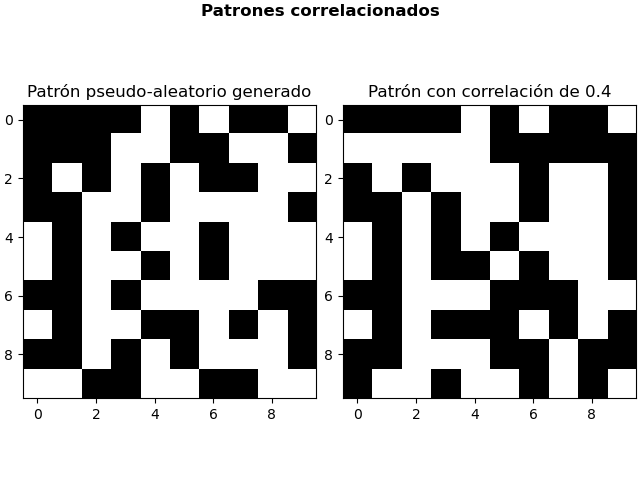

In [19]:
n = 10
m = 70

pattern = np.where(np.random.randint(2, size=n*n) == 0, -1, 1)
pattern1 = corr_pattern(pattern, m)

fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
axes[0].imshow(pattern.reshape(n,n), cmap='gray')
axes[0].set_title('Patrón pseudo-aleatorio generado')
axes[1].imshow(pattern1.reshape(n,n), cmap='gray')
axes[1].set_title(f'Patrón con correlación de {np.corrcoef(pattern,pattern1)[1,0]:0.2}')
fig.suptitle('Patrones correlacionados',fontweight ="bold")
plt.show()

Así, se calcula la capacidad (valor medio y varianza) de la red, asociada a cada $p_{error}$ con patrones cada vez más correlacionados entre sí 

In [20]:
Table = {}
#p_error = [0.001, 0.0036, 0.01, 0.05, 0.1]
p_error = [0.001]
n = 10
for error in p_error:
    C_list = []
    Table[error] = {}
    for m in range(50,100,2):
        corr_mean = []
        Table[error][m] = {}
        for i in range(100):
            E = 0
            patterns = []
            corr = []
            pattern = np.where(np.random.randint(2, size=n*n) == 0, -1, 1)
            patterns.append(pattern.reshape(n,n))
            while E < error:
                W = Hopfield_train(patterns)
                num = 0
                for patter in patterns:
                    S_out = Hopfield(patter, W)
                    num += n*n - np.sum(patter == S_out.reshape(n,n))
                E = num/((n*n)*len(patterns))
                pattern1 = corr_pattern(pattern, m)
                patterns.append(pattern1.reshape(n,n))
                corr.append(np.corrcoef(pattern,pattern1)[1,0]) # Correlación de Pearson
            C = (len(patterns)-1)/(n*n)
            C_list.append(C)
            corr_mean.append(np.mean(np.array(corr)))
        Table[error][m]['C mean'] = np.mean(np.array(C_list))
        Table[error][m]['C std'] = np.std(np.array(C_list))
        Table[error][m]['Corr mean'] = np.mean(np.array(corr_mean))
        Table[error][m]['Corr std'] =  np.std(np.array(corr_mean))
Table = pd.DataFrame(Table)

In [21]:
Data = {}
for error in p_error:
    Data[error] = {}
    C_mean = []
    C_std = []
    Corr_mean = []
    Corr_std = []
    for m in range(50,100,2):
        C_mean.append(Table[error][m]['C mean'])
        C_std.append(Table[error][m]['C std'])
        Corr_mean.append(Table[error][m]['Corr mean'])
        Corr_std.append(Table[error][m]['Corr std'])
    Data[error]['C_mean'] = np.array(C_mean)
    Data[error]['C_std'] = np.array(C_std)
    Data[error]['Corr_mean'] = np.array(Corr_mean)
    Data[error]['Corr_std'] = np.array(Corr_std)

<IPython.core.display.Javascript object>


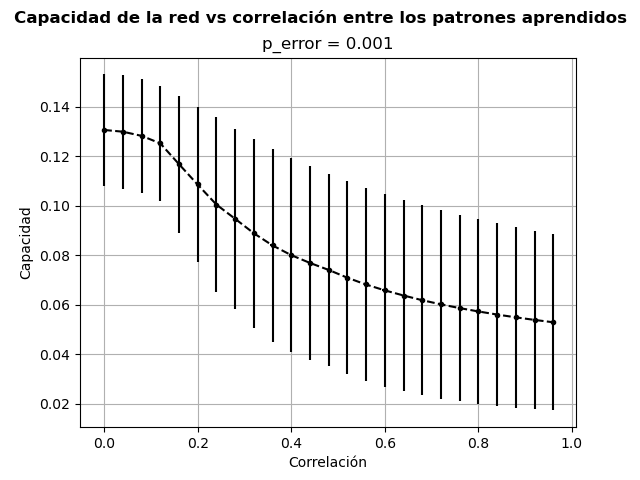

In [22]:
fig, ax = plt.subplots()

fig.suptitle('Capacidad de la red vs correlación entre los patrones aprendidos',fontweight ="bold")
ax.set_title('p_error = 0.001')
ax.set_ylabel('Capacidad')
ax.set_xlabel('Correlación')
ax.errorbar(x = Data[0.001]['Corr_mean'], y = Data[0.001]['C_mean'], yerr = Data[0.001]['C_std'], 
            xerr = Data[0.001]['Corr_std'], fmt='.--', color='black')
plt.grid()
plt.show()

Por lo tanto, la capacidad de la red de Hopfield disminuye a medida que esta aprende patrones que estan cada vez mas correlacionados entre sí.

###  3. Implemente una red de Hopfield ‘82 que aprenda patrones pseudo-aleatorios y estudie qué sucede con los patrones aprendidos cuando algunas interconexiones son eliminadas al azar.

Ahora, estudiaremos la robustes de la red, es decir cuántos errores comete cuando la pertubamos eliminando conexiones sinápticas. La red esta definida por la matriz de los pesos sinápticos $W$, y borrar conexiones significa elegir algunos de sus elementos (pesos sinápticos) al azar e igualarlos a 0. Por lo tanto, hay que ver que ocurre con el error, es decir con

  $$E=\frac{\#\;total\;errores}{Np}$$

### a) ¿Cómo cambia el error en función del porcentaje de sinapsis eliminadas?.

Para esto, definimos una nueva función, la que nos permitira ir eliminado pesos sinápticos al azar.

In [23]:
def delsin(W,s):
    indices = np.array(range(len(W)))
    random.shuffle(indices)
    WS = W.copy()
    for i in list(indices[0:int(len(W)*s)]):
        WS[i] = 0
    return WS

In [24]:
n = 10
Table = {}
for m in range(5,35,5):
    Table[m] = {}
    patterns = []
    for i in range(m):
        pattern = np.where(np.random.randint(2, size=n*n) == 0, -1, 1)
        patterns.append(pattern.reshape(n,n))
    
    W = Hopfield_train(patterns)
    W = W.flatten()
    
    S = []
    s = 0
    while s <= 1:
        Table[m][s] = {}
        S.append(s)
        Table[s] = {}
        E_list = []
        for j in range(100):
            WS = delsin(W,s)
            num = 0
            for pattern in patterns:
                S_out = Hopfield(pattern, WS.reshape(n*n,n*n))
                num += n*n - np.sum(pattern == S_out.reshape(n,n))
            E = num/((n*n)*len(patterns))
            E_list.append(E)
        Table[m][s]['E_mean'] = np.mean(np.array(E_list))
        Table[m][s]['E_std'] = np.std(np.array(E_list))
        s += 0.05
    S = np.array(S)

In [25]:
E_mean = {}
E_std = {}
for m in range(5,35,5):
    E_mean[m] = {}
    E_std[m] = {}
    E_mean[m]['E_mean'] = []
    E_std[m]['E_std'] = []
    for s in list(S):
        E_mean[m]['E_mean'].append(Table[m][s]['E_mean'])
        E_std[m]['E_std'].append(Table[m][s]['E_std'])

<IPython.core.display.Javascript object>


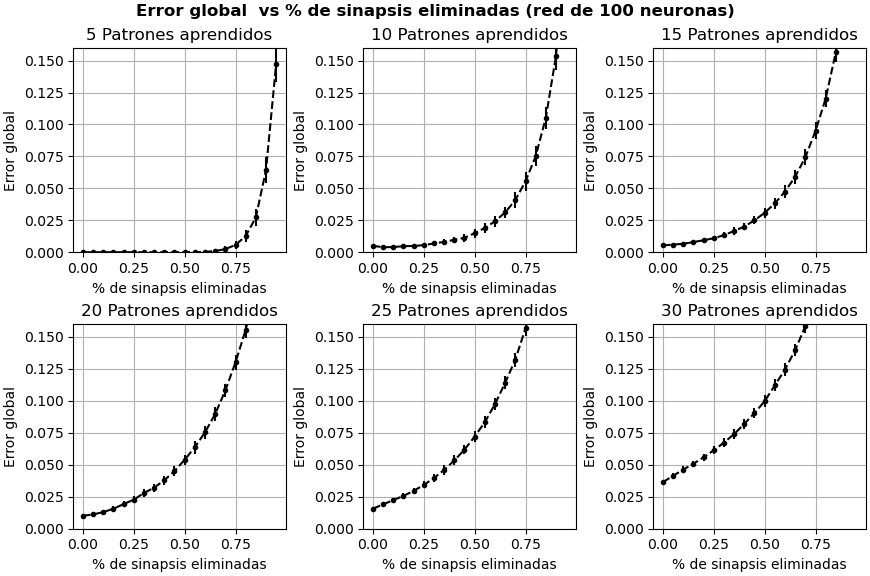

In [26]:
fig, axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
fig.suptitle('Error global  vs % de sinapsis eliminadas (red de 100 neuronas)',fontweight ="bold")

axes[0, 0].errorbar(x = S, y = np.array(E_mean[5]['E_mean']), yerr = np.array(E_std[5]['E_std']), 
                    fmt='.--', color='black')
    
axes[0, 0].set_ylabel('Error global')
axes[0, 0].set_xlabel('% de sinapsis eliminadas')
axes[0, 0].set_title('5 Patrones aprendidos')
axes[0, 0].set(ylim=(0, 0.16))
axes[0, 0].grid()

axes[0, 1].errorbar(x = S, y = np.array(E_mean[10]['E_mean']), yerr = np.array(E_std[10]['E_std']), 
                     fmt='.--', color='black')

axes[0, 1].set_ylabel('Error global')
axes[0, 1].set_xlabel('% de sinapsis eliminadas')
axes[0, 1].set_title('10 Patrones aprendidos')
axes[0, 1].set(ylim=(0, 0.16))
axes[0, 1].grid()

axes[0, 2].errorbar(x = S, y = np.array(E_mean[15]['E_mean']), yerr = np.array(E_std[15]['E_std']), 
                    fmt='.--', color='black')
    
axes[0, 2].set_ylabel('Error global')
axes[0, 2].set_xlabel('% de sinapsis eliminadas')
axes[0, 2].set_title('15 Patrones aprendidos')
axes[0, 2].set(ylim=(0, 0.16))
axes[0, 2].grid()

axes[1, 0].errorbar(x = S, y = np.array(E_mean[20]['E_mean']), yerr = np.array(E_std[20]['E_std']), 
                    fmt='.--', color='black')
    
axes[1, 0].set_ylabel('Error global')
axes[1, 0].set_xlabel('% de sinapsis eliminadas')
axes[1, 0].set_title('20 Patrones aprendidos')
axes[1, 0].set(ylim=(0, 0.16))
axes[1, 0].grid()

axes[1, 1].errorbar(x = S, y = np.array(E_mean[25]['E_mean']), yerr = np.array(E_std[25]['E_std']), 
                    fmt='.--', color='black')
    
axes[1, 1].set_ylabel('Error global')
axes[1, 1].set_xlabel('% de sinapsis eliminadas')
axes[1, 1].set_title('25 Patrones aprendidos')
axes[1, 1].set(ylim=(0, 0.16))
axes[1, 1].grid()

axes[1, 2].errorbar(x = S, y = np.array(E_mean[30]['E_mean']), yerr = np.array(E_std[30]['E_std']), 
                    fmt='.--', color='black')
    
axes[1, 2].set_ylabel('Error global')
axes[1, 2].set_xlabel('% de sinapsis eliminadas')
axes[1, 2].set_title('30 Patrones aprendidos')
axes[1, 2].set(ylim=(0, 0.16))
axes[1, 2].grid()

plt.show()

Del primer gráfico (en la esquina superior izquierda), vemos como para una red de Hopfield con 100 neuronas y 5 patrones aprendidos, el error global de la red es casi nulo y no presenta variación hasta que se elimina un 55% de las sinápsis, luego a partir de este porcentaje el error aumenta abruptamente. Este comportamiento va cambiando gradualmente, definiendo una tendencia exponencial o cuadrática, a medida que el porcentaje de conexiones sinápticas eliminadas de la red aumenta, para la misma red con distinta cantidad de patrones aprendidos. Esto es, a mayor cantidad de patrones aprendidos y a mayor porcentajes de sinápsis eliminadas mayor error global de la red de Hopfield.

### b) ¿Cómo cambia la capacidad en función del porcentaje de sinapsis eliminadas?

In [27]:
Table = {}
#p_error = [0.001, 0.0036, 0.01, 0.05, 0.1]
p_error = [0.001]
n = 10
for error in p_error:
    Table[error] = {}
    C_mean = []
    C_std = []
    S = []
    s = 0
    while s <= 1:
        C_list = []
        for i in range(100):    
            E = 0
            patterns = []
            while  E < error:
                pattern = np.where(np.random.randint(2, size=n*n) == 0, -1, 1).reshape(n,n)
                patterns.append(pattern)
                W = Hopfield_train(patterns)
                WS = delsin(W.flatten(),s)
                num = 0
                for pattern in patterns:
                    S_out = Hopfield(pattern, WS.reshape(n*n,n*n), Sync = True)
                    num += n*n - np.sum(pattern == S_out.reshape(n,n))
                E = num/((n*n)*len(patterns))
            C = (len(patterns)-1)/(n*n)
            C_list.append(C)
        C_mean.append(np.mean(np.array(C_list)))
        C_std.append(np.std(np.array(C_list)))
        S.append(s)
        s += 0.05
    Table[error]['%Sinap'] = np.array(S)
    Table[error]['C_mean'] = np.array(C_mean)
    Table[error]['C_std'] = np.array(C_std)

<IPython.core.display.Javascript object>


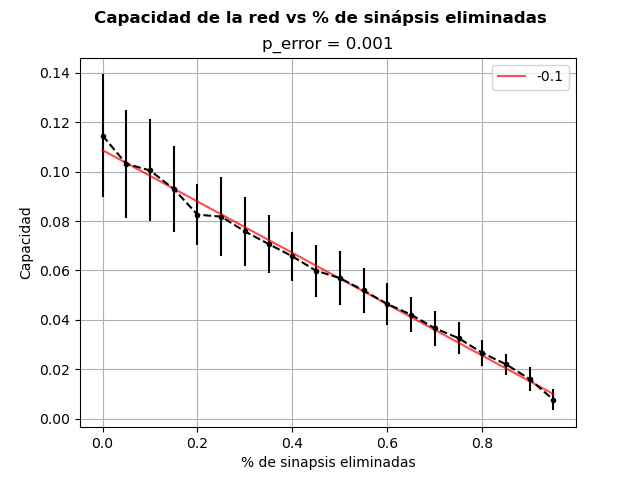

In [28]:
fig, ax = plt.subplots()

fig.suptitle('Capacidad de la red vs % de sinápsis eliminadas',fontweight ="bold")
ax.set_title('p_error = 0.001')
ax.set_ylabel('Capacidad')
ax.set_xlabel('% de sinapsis eliminadas')
ax.errorbar(x = Table[0.001]['%Sinap'], y = Table[0.001]['C_mean'], yerr = Table[0.001]['C_std']
            , fmt='.--', color='black')

fit = np.polyfit(np.array(Table[0.001]['%Sinap']), np.array(Table[0.001]['C_mean']), 1)
fit_eq = fit[0]*np.array(Table[0.001]['%Sinap'])+fit[1]

ax.plot(Table[0.001]['%Sinap'], fit_eq, color='r', alpha=0.7, label= str(round(fit[0], 2)))
ax.legend(loc='upper right')

plt.grid()
plt.show()

La capacidad de la red disminuirá a medida que el porcentaje de sinápsis eliminadas aumenta. Por
lo tanto, la capacidad sera inversamente proporcional a la cantidad de sinápsis eliminadas.

### 4. Simular un modelo de Ising en una y dos dimensiones. Encontrar la temperatura crítica para ambos casos.

Definimos las funciónes a emplear en este problema, la primera permite obtener la matriz de fuerzas
de interacción de intercambio W, equivalente a la matriz de conexión de pesos sinápticos en la red
de Hopfield. La segunda simula el modelo de Ising con el algoritmo de Metropolis en el caso de 1D
y 2D dimensiones.

In [29]:
def Ising_iteraction(n, oneD = True):
    if oneD:
        W = np.zeros([n, n])
        for i in range(n):
            for j in range(n):
                if j == i + 1:
                    W[i, j] = 1
                if j == i - 1:
                    W[i, j] = 1
    else:
        A = np.zeros([n*n, n*n])
        m = 0
        for i in range(n):
            for j in range(n):
                w = np.zeros([n, n])
                if i == 0 and j == 0:
                    w[i+1, j] = 1
                    w[i, j + 1] = 1
                elif i == 0 and j == n-1:
                    w[i,j-1] = 1
                    w[i+1,j] = 1
                elif i == 0 and (j > 0 and j < n - 1):
                    w[i, j + 1] = 1
                    w[i, j - 1] = 1
                    w[i+1, j] = 1
                elif (i != 0 and i < n-1) and j == 0:
                    w[i-1, j] = 1
                    w[i, j+1] = 1
                    w[i+1, j] = 1
                elif (i != 0 and i < n-1) and (j != 0 and j < n-1):
                    w[i-1, j] = 1
                    w[i+1, j] = 1
                    w[i, j+1] = 1
                    w[i, j-1] = 1   
                A[m] = w.flatten()
                m += 1
        B = np.fliplr(np.flipud(A))
        W = A + B
        W[W == 2] = 1
    return W

def Ising(n, T, oneD = True):
    if oneD:
        S_in = np.zeros(n)
        indices = np.array(range(len(S_in)))
        random.shuffle(indices)
        indices_ = np.delete(indices, indices[:50])
        for indice in indices_:
            S_in[indice] = 1
        S_in = np.where(S_in == 0, -1, 1)
        W = Ising_iteraction(n)
        H0 = -0.5*(S_in.dot(W)).dot(np.transpose(S_in))
        S_prom = []
        T_tot = []
        while T > 0:
            T_tot.append(T)
            S_prom.append(np.mean(S_in))
            for i in indices:
                spin = S_in[i]
                S_in[i] = -spin
                H1 = -0.5*(S_in.dot(W)).dot(np.transpose(S_in))
                if H1-H0 <= 0:
                    H0 = H1
                else:
                    prob = math.exp(-(H1-H0)/T)
                    array = np.array([-spin]*int(prob*100) + [spin]*int((1-prob)*100))
                    random.shuffle(array)
                    indice = np.array(range(len(array)))
                    random.shuffle(indice)
                    S_in[i] = array[indice[0]]
            T += -0.1
        T_tot = np.array(T_tot)
        S_prom = np.array(S_prom)
    else:
        S_in = np.zeros(n*n)
        indices = np.array(range(len(S_in)))
        random.shuffle(indices)
        indices_ = np.delete(indices, indices[:50])
        for indice in indices_:
            S_in[indice] = 1
        S_in = np.where(S_in == 0, -1, 1)
        W = Ising_iteraction(n, oneD=False)
        H0 = -0.5*(S_in.dot(W)).dot(np.transpose(S_in))
        S_prom = []
        T_tot = []
        while T > 0:
            T_tot.append(T)
            S_prom.append(np.mean(S_in))
            for i in indices:
                spin = S_in[i]
                S_in[i] = -spin
                H1 = -0.5*(S_in.dot(W)).dot(np.transpose(S_in))
                if H1-H0 <= 0:
                    H0 = H1
                else:
                    prob = math.exp(-(H1-H0)/T)
                    array = np.array([-spin]*int(prob*100) + [spin]*int((1-prob)*100))
                    random.shuffle(array)
                    indice = np.array(range(len(array)))
                    random.shuffle(indice)
                    S_in[i] = array[indice[0]]
            T += -0.01
        T_tot = np.array(T_tot)
        S_prom = np.array(S_prom)
    return S_prom, T_tot

<IPython.core.display.Javascript object>


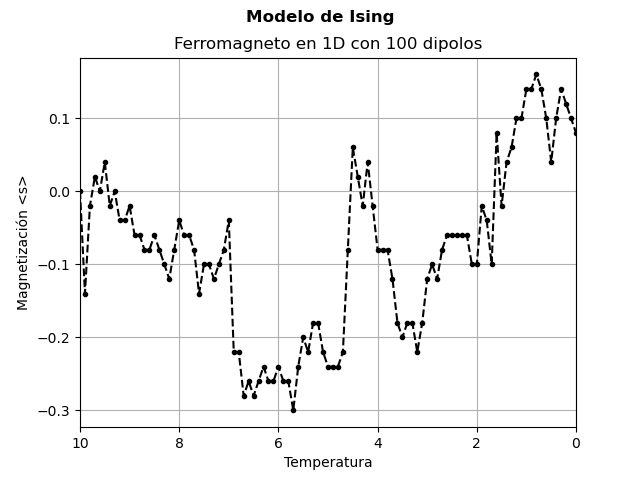

In [30]:
S_prom, T = Ising(100, 10)

fig, ax = plt.subplots()
fig.suptitle('Modelo de Ising',fontweight ="bold")
ax.set_title('Ferromagneto en 1D con 100 dipolos')
ax.set_ylabel('Magnetización <s>')
ax.set_xlabel('Temperatura')
ax.set_xlim(10,0)
ax.errorbar(x = T, y = S_prom, fmt='.--', color='black')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


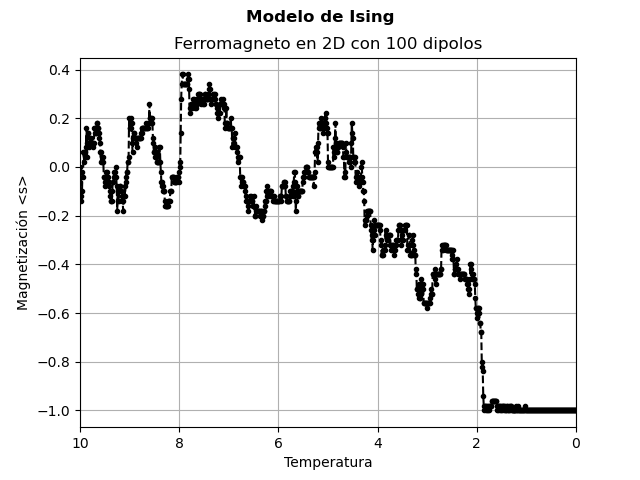

In [31]:
S_prom, T = Ising(10, 10, oneD= False)

fig, ax = plt.subplots()
fig.suptitle('Modelo de Ising',fontweight ="bold")
ax.set_title('Ferromagneto en 2D con 100 dipolos')
ax.set_ylabel('Magnetización <s>')
ax.set_xlabel('Temperatura')
ax.set_xlim(10,0)
ax.errorbar(x = T, y = S_prom, fmt='.--', color='black')
plt.grid()
plt.show()